Load and Preview the Data

In [4]:
import pandas as pd

# Replace with the exact filename if different
df = pd.read_csv("indian movies.csv")

# Show basic info and top rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


Clean the Dataset

*   Removes non-numeric junk (like "$5.16M") from the Votes column
*   Converts Votes to proper float
*   Handles missing Timing(min) values gracefully

In [6]:
import numpy as np
import pandas as pd

# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Convert 'Year' and 'Rating(10)' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating(10)'] = pd.to_numeric(df['Rating(10)'], errors='coerce')

# Keep only rows where 'Votes' is purely numeric (remove currency, etc.)
df = df[df['Votes'].str.replace(',', '').str.replace('.', '').str.isnumeric() == True]

# Now clean 'Votes'
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Clean 'Timing(min)' by extracting numeric duration
df['Timing(min)'] = df['Timing(min)'].str.extract(r'(\d+)').astype(float)

# Check results
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 23676 entries, 2 to 50596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23676 non-null  object 
 1   Movie Name   23676 non-null  object 
 2   Year         22079 non-null  float64
 3   Timing(min)  16897 non-null  float64
 4   Rating(10)   23676 non-null  float64
 5   Votes        23676 non-null  float64
 6   Genre        22032 non-null  object 
 7   Language     23676 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.6+ MB


/tmp/ipython-input-6-4082508427.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
/tmp/ipython-input-6-4082508427.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timing(min)'] = df['Timing(min)'].str.extract(r'(\d+)').astype(float)


,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
2,tt0493437,Apna Sapna Money Money,2006.0,134.0,5.3,1892.0,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987.0,NaN,2.2,20.0,NaN,urdu
4,tt0049595,Parivar,1956.0,NaN,7.4,21.0,"Comedy, Drama, Family",hindi
6,tt6597160,Jacqueline I Am Coming,2019.0,112.0,7.9,16.0,Drama,hindi
7,tt0829459,A Mighty Heart,2007.0,108.0,6.6,26885.0,"Biography, Drama, History",urdu


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


Average Rating Over the Years

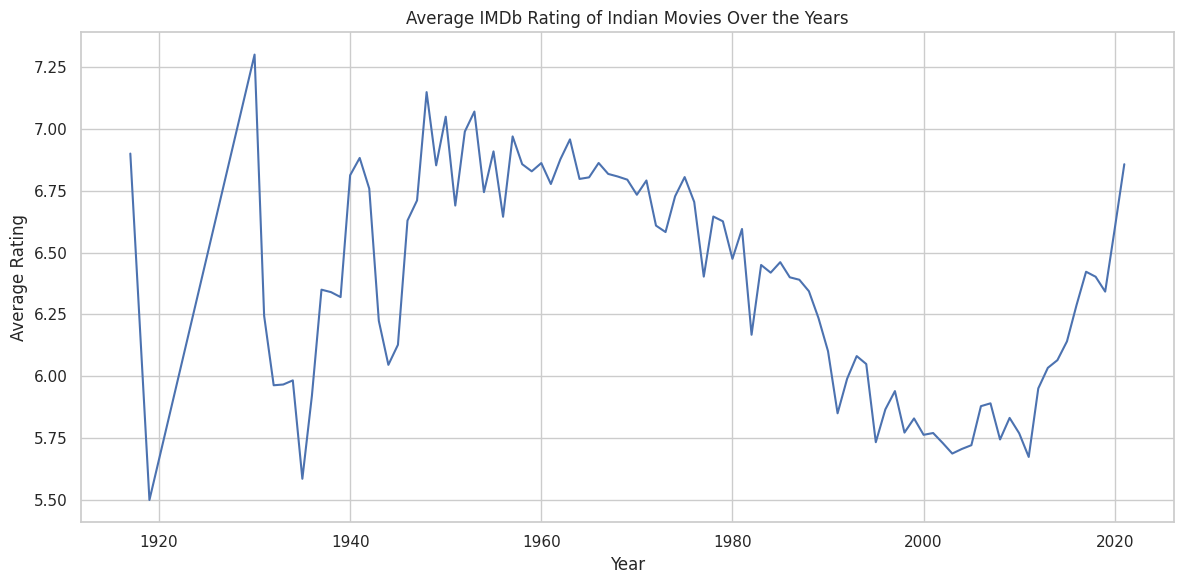

In [8]:
# Group by year and calculate mean rating
ratings_by_year = df.groupby('Year')['Rating(10)'].mean().dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values)
plt.title('Average IMDb Rating of Indian Movies Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


Most Common Movie Genres

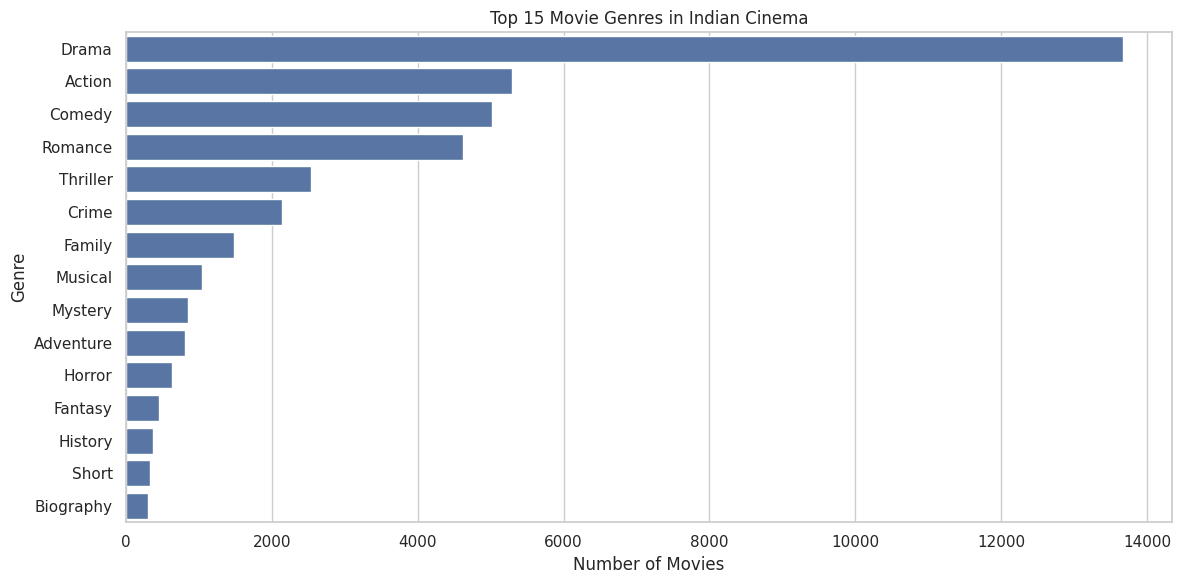

In [9]:
# Split genres by comma and count frequency
from collections import Counter

all_genres = df['Genre'].dropna().str.split(', ')
flattened = [genre.strip() for sublist in all_genres for genre in sublist]
genre_counts = Counter(flattened)
top_genres = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=top_genres.head(15))
plt.title('Top 15 Movie Genres in Indian Cinema')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Votes vs Rating Correlation

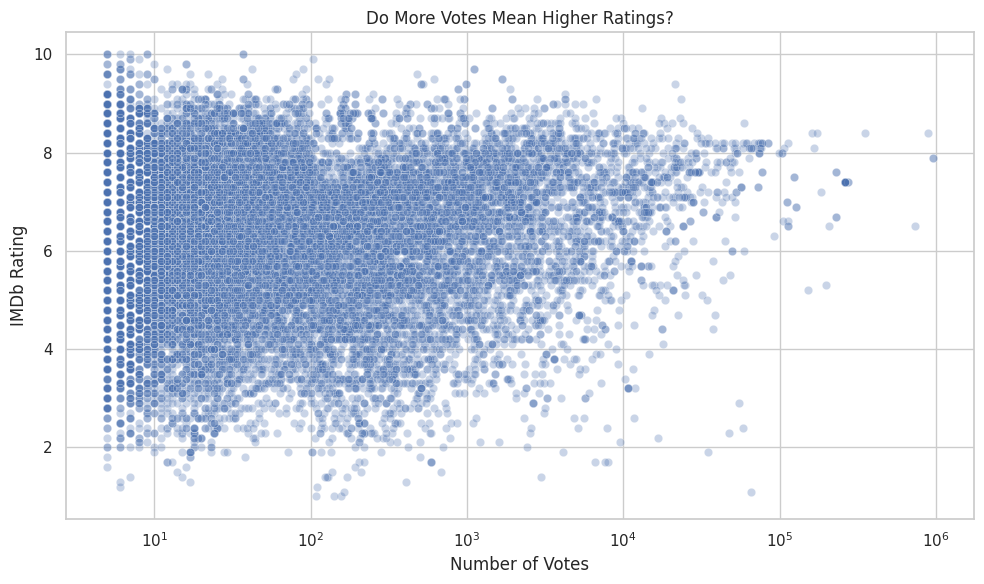

In [10]:
# Scatter plot of votes vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Rating(10)', alpha=0.3)
plt.title('Do More Votes Mean Higher Ratings?')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.xscale('log')  # log scale for better clarity
plt.tight_layout()
plt.show()


Highest Rated Movies in the Dataset

In [11]:
# Filter out movies without ratings or votes
top_movies = df.dropna(subset=['Rating(10)', 'Votes'])

# Only include movies with more than 100 votes to avoid unfair ratings
top_movies = top_movies[top_movies['Votes'] > 100]

# Sort by rating
top_10 = top_movies.sort_values(by='Rating(10)', ascending=False).head(10)

top_10[['Movie Name', 'Year', 'Rating(10)', 'Votes']]


,Movie Name,Year,Rating(10),Votes
11575,Maassab (The Teacher),2021.0,9.9,104.0
8123,Coke Studio,NaN,9.7,1102.0
36315,Coke Studio,NaN,9.7,1102.0
32198,Vaarthakal Ithuvare,2019.0,9.6,481.0
32713,Andavaada,2019.0,9.5,111.0
6420,Ranganayaki,2019.0,9.5,131.0
42014,Alpha Bravo Charlie,1998.0,9.5,1667.0
18129,Pichhodu,2019.0,9.5,612.0
41132,Alpha Bravo Charlie,1998.0,9.5,1667.0
20991,Balamitra,2021.0,9.4,527.0


Languages with Highest Average Rating

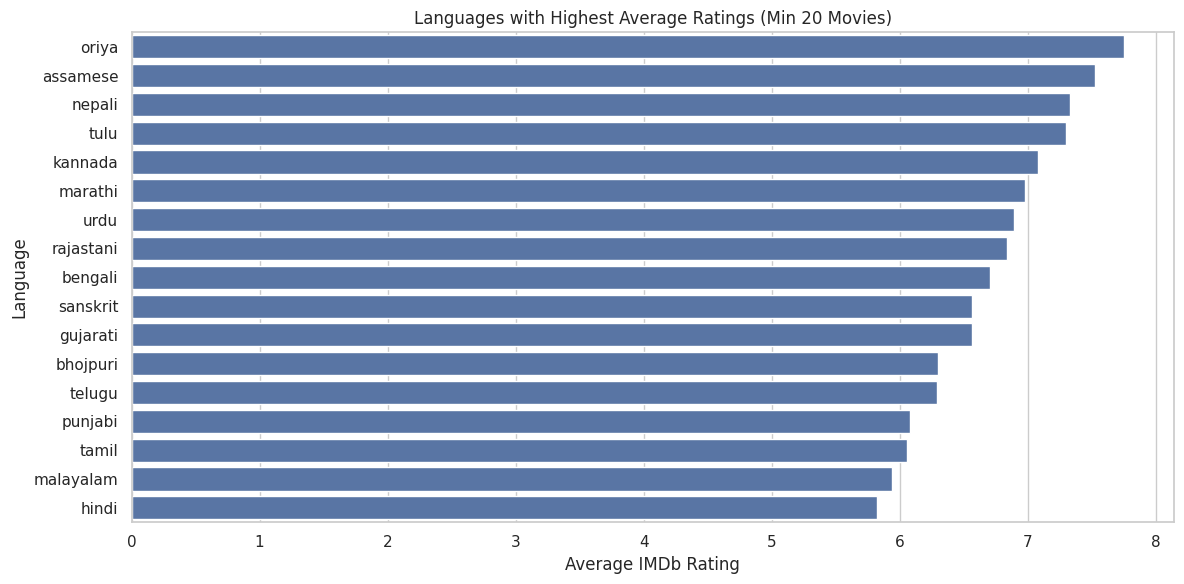

In [12]:
# Group by language and calculate average rating
lang_rating = df.groupby('Language')['Rating(10)'].mean().dropna()

# Filter languages with at least 20 movies
lang_counts = df['Language'].value_counts()
popular_langs = lang_counts[lang_counts >= 20].index
filtered_lang_rating = lang_rating[lang_rating.index.isin(popular_langs)].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_lang_rating.values, y=filtered_lang_rating.index)
plt.title('Languages with Highest Average Ratings (Min 20 Movies)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Language')
plt.tight_layout()
plt.show()


Year with the Most Movies Produced

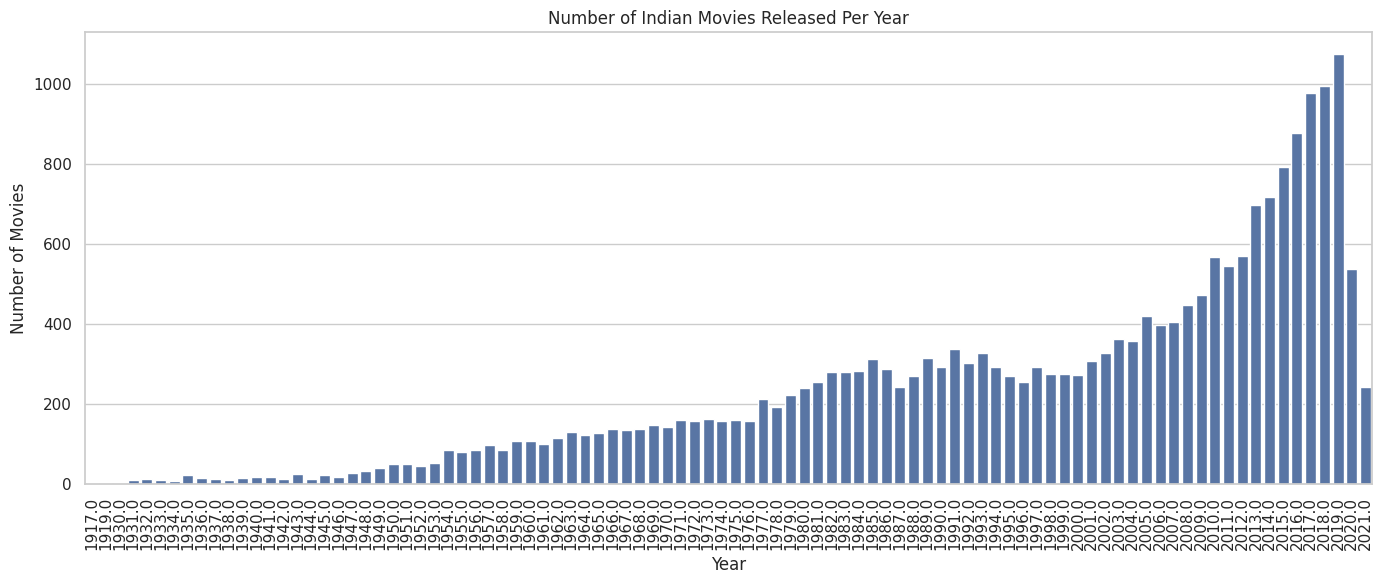

(np.float64(2019.0), 1075)

In [13]:
# Count movies per year
movies_per_year = df['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Indian Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Find the year with most movies
movies_per_year.idxmax(), movies_per_year.max()


Movie Length Over Time

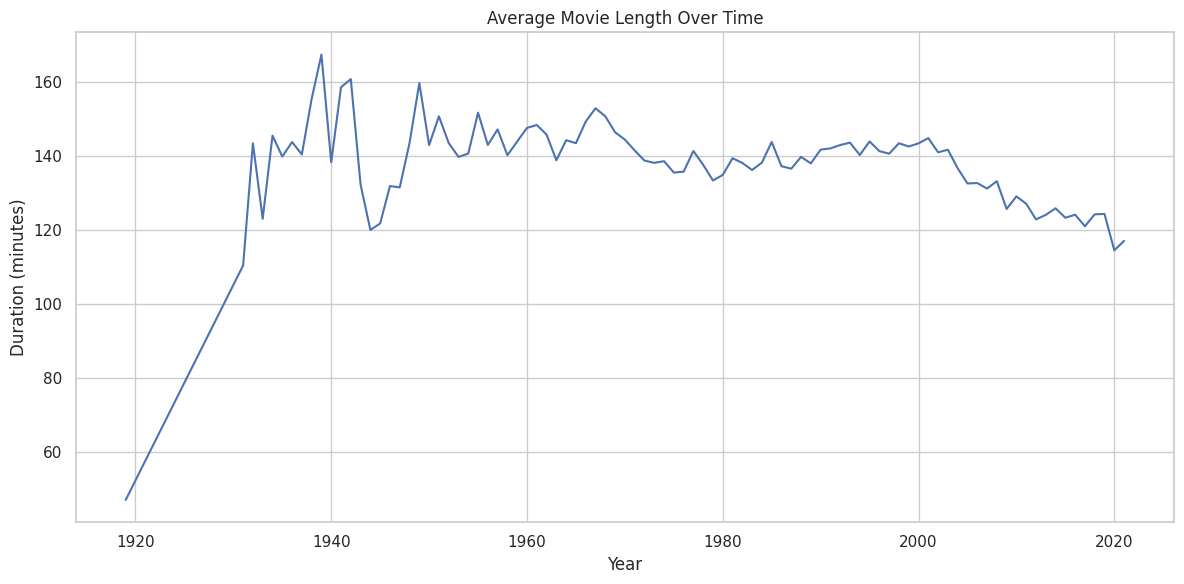

In [14]:
# Group by year and calculate average timing
avg_length = df.groupby('Year')['Timing(min)'].mean().dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_length.index, y=avg_length.values)
plt.title('Average Movie Length Over Time')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()
